In [142]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [143]:
from IPython.display import Image
Image(url= "https://images.unsplash.com/photo-1528548335758-27c5d3aa8bde?q=80&w=1931&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D")

# **Importing The Libraries**

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read In and Explore the Data

In [145]:
predict = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [146]:
predict.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [147]:
# To know number of columns and rows 
predict.shape

(891, 12)

In [148]:
predict.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [149]:
#get a list of the features within the dataset
print(predict.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [150]:
# see a sample of the dataset to get an idea of the variables
predict.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
537,538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,NaN,C
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S
454,455,0,3,"Peduzzi, Mr. Joseph",male,NaN,0,0,A/5 2817,8.0500,NaN,S
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C


In [151]:
predict.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [152]:
predict.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [153]:
# check for any other unusable values
print(pd.isnull(predict).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


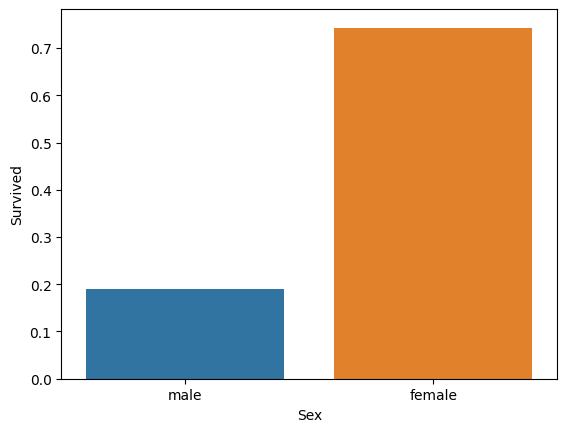

In [154]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=predict, ci=0)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", predict["Survived"][predict["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", predict["Survived"][predict["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


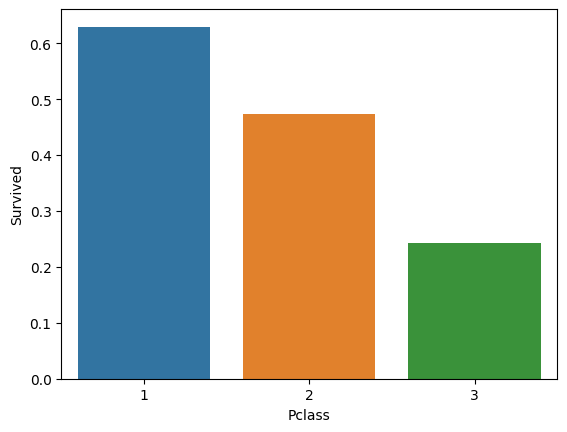

In [155]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=predict, ci = 0)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", predict["Survived"][predict["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", predict["Survived"][predict["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", predict["Survived"][predict["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


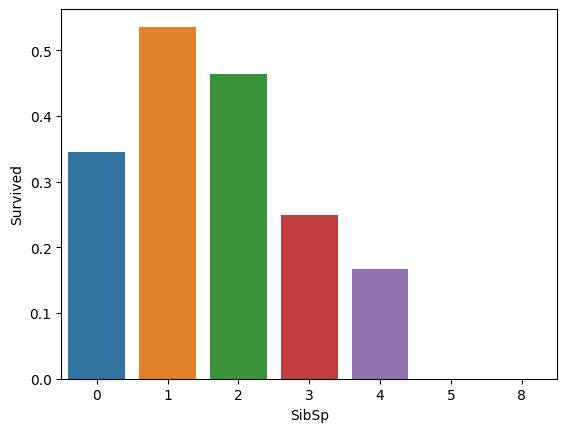

In [156]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=predict, ci = 0)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", predict["Survived"][predict["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", predict["Survived"][predict["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", predict["Survived"][predict["SibSp"] == 2].value_counts(normalize = True)[1]*100)

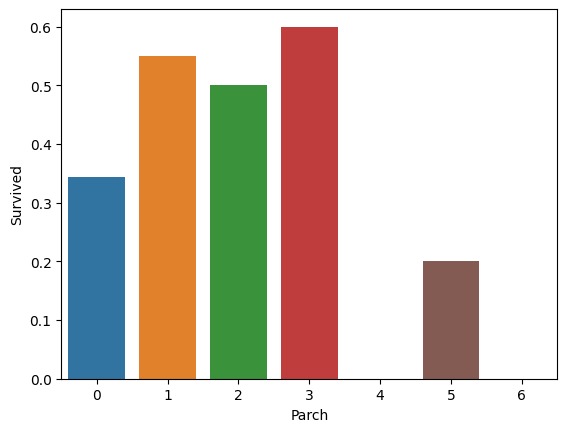

In [157]:
# draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=predict, ci = 0)
plt.show()

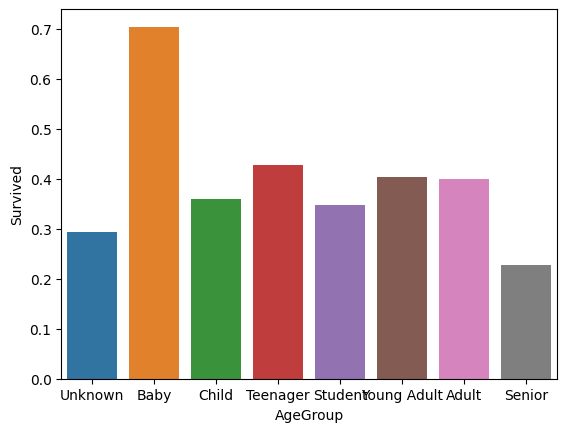

In [158]:
#sort the ages into logical categories
predict["Age"] = predict["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
predict['AgeGroup'] = pd.cut(predict["Age"], bins, labels = labels)


#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=predict, ci = 0)
plt.show()

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


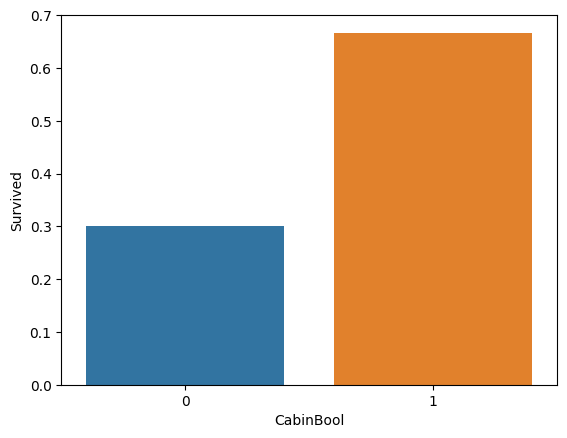

In [159]:
predict["CabinBool"] = (predict["Cabin"].notnull().astype('int'))


#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", predict["Survived"][predict["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", predict["Survived"][predict["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=predict, ci=0)
plt.show()

In [160]:
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
predict = predict.drop(['Cabin'], axis = 1)

In [161]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information
predict = predict.drop(['Ticket'], axis = 1)

In [162]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = predict[predict["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = predict[predict["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = predict[predict["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [163]:
#replacing the missing values in the Embarked feature with S
predict = predict.fillna({"Embarked": "S"})

In [164]:
#create a combined group of both datasets
combine = [predict]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(predict['Title'], predict['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [165]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    predict[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

In [166]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

predict.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [167]:
# fill missing age with mode age group for each title
mr_age = predict[predict["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = predict[predict["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = predict[predict["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = predict[predict["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = predict[predict["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = predict[predict["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

#I tried to get this code to work with using .map(), but couldn't.
#I've put down a less elegant, temporary solution for now.
#train = train.fillna({"Age": train["Title"].map(age_title_mapping)})
#test = test.fillna({"Age": test["Title"].map(age_title_mapping)})

for x in range(len(predict["AgeGroup"])):
    if predict["AgeGroup"][x] == "Unknown":
        predict["AgeGroup"][x] = age_title_mapping[predict["Title"][x]]

In [168]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
predict['AgeGroup'] = predict['AgeGroup'].map(age_mapping)

predict.head()

#dropping the Age feature for now, might change
predict = predict.drop(['Age'], axis = 1)

In [169]:
#drop the name feature since it contains no more useful information.
predict = predict.drop(['Name'], axis = 1)

In [170]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
predict['Sex'] = predict['Sex'].map(sex_mapping)

predict.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


In [171]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
predict['Embarked'] = predict['Embarked'].map(embarked_mapping)

predict.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


In [172]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(predict["Fare"])):
    if pd.isnull(predict["Fare"][x]):
        pclass = predict["Pclass"][x] #Pclass = 3
        predict["Fare"][x] = round(predict[predict["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
predict['FareBand'] = pd.qcut(predict['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
predict = predict.drop(['Fare'], axis = 1)

In [173]:
#check data
predict.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [174]:
from sklearn.model_selection import train_test_split

predictors = predict.drop(['Survived', 'PassengerId'], axis=1)
target = predict["Survived"]
x_train1, X_test1, Y_train1, Y_test1 = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

In [175]:
X_train1 = predict.drop("Survived", axis=1)
Y_train1 = predict["Survived"]
X_test1  = predict.drop("PassengerId", axis=1).copy()
Y_test1  = predict.drop("PassengerId", axis=1).copy()
X_train1.shape, Y_train1.shape, X_test1.shape

((891, 10), (891,), (891, 10))

In [186]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train1, Y_train1)
Z_pred = logreg.predict(X_test1)
acc_log = round(logreg.score(X_train1, Y_train1) * 100, 2)
acc_log


80.25

In [187]:
coeff_df = pd.DataFrame(predict.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Pclass,2.613082
4,Parch,0.258856
3,SibSp,-0.020875
2,Sex,-0.209010
0,Survived,-0.932545
5,Embarked,NaN
6,AgeGroup,NaN
7,CabinBool,NaN
8,Title,NaN
9,FareBand,NaN


In [188]:
# Support Vector Machines

from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train1, Y_train1)
Z_pred = svc.predict(X_test1)
acc_svc = round(svc.score(X_train1, Y_train1) * 100, 2)
acc_svc

80.92

In [189]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train1, Y_train1)
Z_pred = knn.predict(X_test1)
acc_knn = round(knn.score(X_train1, Y_train1) * 100, 2)
acc_knn

82.27

In [190]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train1, Y_train1)
Z_pred = gaussian.predict(X_test1)
acc_gaussian = round(gaussian.score(X_train1, Y_train1) * 100, 2)
acc_gaussian

79.01

In [191]:
# Perceptron
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train1, Y_train1)
Z_pred = perceptron.predict(X_test1)
acc_perceptron = round(perceptron.score(X_train1, Y_train1) * 100, 2)
acc_perceptron

79.01

In [192]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train1, Y_train1)
Z_pred = linear_svc.predict(X_test1)
acc_linear_svc = round(linear_svc.score(X_train1, Y_train1) * 100, 2)
acc_linear_svc

79.35

In [193]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train1, Y_train1)
Z_pred = sgd.predict(X_test1)
acc_sgd = round(sgd.score(X_train1, Y_train1) * 100, 2)
acc_sgd

75.98

In [194]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train1, Y_train1)
Z_pred = decision_tree.predict(X_test1)
acc_decision_tree = round(decision_tree.score(X_train1, Y_train1) * 100, 2)
acc_decision_tree

83.73

In [195]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train1, Y_train1)
Z_pred = random_forest.predict(X_test1)
random_forest.score(X_train1, Y_train1)
acc_random_forest = round(random_forest.score(X_train1, Y_train1) * 100, 2)
acc_random_forest

83.73

In [196]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,83.73
8,Decision Tree,83.73
1,KNN,82.27
0,Support Vector Machines,80.92
2,Logistic Regression,80.25
7,Linear SVC,79.35
4,Naive Bayes,79.01
5,Perceptron,79.01
6,Stochastic Gradient Decent,75.98


In [199]:
submission = pd.DataFrame({
        "PassengerId": predict["PassengerId"],
        "Survived": Z_pred
    })
# submission.to_csv('../output/submission.csv', index=False)